# Linear regression

You will implement linear regression with multiple variables to predict the prices of houses. 

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing
prices.

The file `ex1.csv` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [1]:
import matplotlib.pyplot as plt #for graphics
import numpy as np
import pandas as pd

**Exercise 1.** Load the file and explore it, give preliminary conclusions.

In [2]:
data = pd.read_csv('ex1.csv')
data.head(4)

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000


By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

**Exercise 2.** Normalize the data by mean centering and dividing each column with the standard deviations. Do a code that can be generalized to any number of features and examples.

In [3]:
y = data['price']
data.drop(columns=['price'], inplace=True)

In [4]:
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [5]:
data.head()

,area,bedrooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [6]:
data.mean().values

array([2000.68085106,    3.17021277])

In [7]:
def normalize_data(X):
    """
    Get a pandas dataframe a return the normalize mean centered data.
    """
    feature_mean = X.mean().values
    feature_std = X.std().values
    data = X.values
    data = (data - feature_mean)/feature_std
    return data, feature_mean, feature_std

In [8]:
data, feature_mean, feature_std = normalize_data(data)

In [9]:
pd.DataFrame(columns = ['area', 'bedrooms'], data = data).head()

,area,bedrooms
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within +2 and -2 standard deviations of the mean).

**Exercise 3.** Add a column of ones to your data. This will be the column correspondig to $x_0$.

In [10]:
N, F = data.shape

In [11]:
data_with_ones = np.hstack((np.ones(shape=(N,1)), data))
data_with_ones

array([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
       [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
       [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
       [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
       [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
       [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
       [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
       [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
       [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
       [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
       [ 1.00000000e+00, -8.56523009e-01

## Gradient descent

As you perform gradient descent to learn minimize the cost function it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

**Exercise 4**. Create a function called `computeCost`, which is a function that computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values, but matrices whose rows represent the examples from the training set. Run computeCost once using $\theta$ initialized to zeros, and print the cost. You should expect to see a cost of 32.07.

* $ p = \theta_1+\theta_2x$
* $ p = (\theta_1, \theta_2) ( 1, x )^{T}$
* $ p = ( 1, x ) (\theta_1, \theta_2)^{T}$

In [12]:
N, F = data_with_ones.shape

In [13]:
y = y.values

In [14]:
def computeCost(theta, X, y):
    N, _ = X.shape
    pred = X.dot(theta)
    cost = np.linalg.norm(pred - y)**2/(2*N)
    return cost

In [15]:
theta = np.zeros(shape=(F,))
print(computeCost(theta, data_with_ones, y))

65591548106.45746


Next, you will implement gradient descent. As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$
by changing the values of the vector $\theta$, not by changing $X$ or $y$. Refer to the
A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

**Exercise 5.** Implement a gradient descent algorithm for your data. Run your algorithm for 50 iterations and plot the $J(\theta)$ against the number of iterations for different values of the learning rate.

In [16]:
theta = np.zeros(shape=(F,))
theta

array([0., 0., 0.])

In [19]:
lrs = [1, 0.5, 0.05, 0.005, 0.002, 0.0001, 0.00005]
lr_cost = []
for lr in lrs:
    theta = np.zeros(shape=(F,))
    cost_history = []
    for i in range(50):
        cost = computeCost(theta, data_with_ones, y)
        pred = data_with_ones.dot(theta)
        for j in range(N):
            theta -= lr * data_with_ones[j] * (pred[j] - y[j])
        print('\r iteration = {0}'.format(i), end = '\r', flush=True)
        cost_history.append(cost)
    lr_cost.append(cost_history)

In [20]:
lrs = [1, 0.5, 0.05, 0.03, 0.024, 0.023, 0.02, 0.01, 0.005]
lr_cost = []
for lr in lrs:
    theta = np.zeros(shape=(F,))
    cost_history = []
    for i in range(50):
        cost = computeCost(theta, data_with_ones, y)
        pred = data_with_ones.dot(theta)
        theta -= 1/N * lr * sum(data_with_ones * (pred-y).reshape(-1,1))
        print('\r iteration = {0}'.format(i), end = '\r', flush=True)
        cost_history.append(cost)
    lr_cost.append(cost_history)

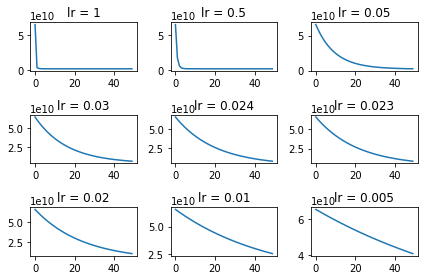

In [21]:
for i in range(len(lrs)):
    plt.subplot(3,3,i+1)
    plt.plot(np.arange(50), lr_cost[i])
    plt.title(f'lr = {lrs[i]}')
    plt.tight_layout()
plt.show()

In [22]:
def train(lr, y, data_with_ones):
    """
    Train the linear regression algorithm
    """
    N, F = data_with_ones.shape
    theta = np.zeros(shape=(F,))
    cost_history = []
    for i in range(50):
        cost = computeCost(theta, data_with_ones, y)
        pred = data_with_ones.dot(theta)
        theta -= 1/N * lr * sum(data_with_ones * (pred-y).reshape(-1,1))
        print('\r iteration = {0}'.format(i), end = '\r', flush=True)
        cost_history.append(cost)
    lr_cost.append(cost_history)
    return theta

In [23]:
theta = train(0.05, y, data_with_ones)

In [24]:
pred = data_with_ones.dot(theta)

In [25]:
pred, y

(array([323197.83291586, 266180.97077497, 356683.92655416, 229443.19821864,
        440483.23611567, 325657.61097082, 258714.47692319, 246609.70658772,
        241292.65793569, 254189.32913423, 320566.81970824, 311432.44866456,
        298988.29224493, 623609.53964484, 228622.24412661, 361293.14980888,
        218582.84352513, 225002.12589544, 396249.91647859, 443990.22565211,
        285073.46279388, 282839.94212836, 266633.48555387, 323055.65099217,
        525245.6816929 , 209616.62341298, 250116.69612416, 370938.14208938,
        334058.18760936, 383495.42720374, 277296.63608688, 166459.56848634,
        331879.68918064, 440059.77456574, 305973.21808885, 247740.99353496,
        225341.51197961, 342287.52909525, 577934.60020531, 345681.38993697,
        257499.11451019, 338357.07800887, 391498.51130018, 220929.49288537,
        165638.61439431, 310611.49457253, 221268.87896955]),
 array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
        212000, 242500, 239999,

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!


**Exercise 6.** Using the best learning rate that you found, run gradient descent until convergence to find the final values of $\theta$. Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms.

In [26]:
data = pd.read_csv('ex1.csv')
data.head()

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [27]:
new_data = pd.DataFrame(columns = ['area', 'bedrooms', 'price'], index = [data.shape[0]])
new_data.iloc[0] = [1650, 3, np.nan]
new_data

,area,bedrooms,price
47,1650,3,NaN


In [28]:
data = data.append(new_data)

In [29]:
data.tail(4)

,area,bedrooms,price
44,852,2,179900
45,1852,4,299900
46,1203,3,239500
47,1650,3,NaN


In [30]:
to_predict = data.iloc[-1,:2].values.reshape(1,-1)
x_new = np.hstack((np.ones(shape=(1,1)), to_predict))

In [36]:
x_new = x_new.reshape(3)

In [37]:
feature_mean

array([2000.68085106,    3.17021277])

In [40]:
x_new[1:] = (x_new[1:] - feature_mean)/feature_std

In [41]:
x_new

array([1.0, -0.4412732005944351, -0.2236751871685913], dtype=object)

In [42]:
theta

array([314219.61589963,  89903.63994937,  12116.42416497])

In [44]:
# Make the prediction
pred = x_new.dot(theta)
pred

271837.4055111686

In [46]:
data.iloc[-1,-1] = pred

In [48]:
data.tail(4) # see the prediction in the pandas datafram

,area,bedrooms,price
44,852,2,179900
45,1852,4,299900
46,1203,3,239500
47,1650,3,271837


### Ordinary least squares solution

You learned that the closed-form solution to linear regression is the ordinary least squares solution.
Using this formula does not require any feature scaling, and you will get
an exact solution in one calculation: there is no "loop until convergence" like
in gradient descent. OLS doesn't need 

**Exercise 7.** Calculate the ordinary least squares solution and compare to the solution obtained with gradient descent algorithm.

formula: $\beta = (X^{T}X)^{-1}X^{T}y$

In [85]:
data = pd.read_csv('ex1.csv')
X = data.drop(columns = ['price']).copy()
y = data['price'].copy()

In [90]:
X = X.values
y = y.values

In [92]:
theta = np.linalg.pinv(X.T@X)@X.T@y

In [93]:
theta

array([  140.86108621, 16978.19105904])

In [94]:
x_new = np.array([[1650, 3]])

In [95]:
pred = x_new.dot(theta)

In [96]:
pred

array([283355.36542505])

### Using scikit-learn library for linear regression

Scikit-learn is probably the most useful library for machine learning in Python. This library contains a lot of effiecient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
With this library we can fit several machine learnings including linear regression, without programming the optimization algorithms.
Let's see how this works.

First we need to import the required libraries into python environment

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Now we need to fit our linear model. This is equivalent to finding the values of $\theta$.

**Exercise 8.** Complete the following code to fit a linear regression model. Scikit-learn linear regression adds an intercept automatically, which means that your matrix X_train shouldn't include the column of ones. Compare the values of $\theta$ with the ones that you obtained with gradient descent and OLS.

In [74]:
X_train = pd.read_csv('ex1.csv')
y_train = X_train['price']
X_train.drop(columns = ['price'], inplace=True)

In [75]:
st = StandardScaler()

In [76]:
X_train = st.fit_transform(X_train)

In [77]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept (\theta_0)
print(regressor.intercept_)
#For retrieving the rest of parameters:
print(regressor.coef_)

340412.6595744681
[109447.79646964  -6578.35485416]


**Exercise 9.** Let's use scikit learn to predict the price of a house with 1650 square feet and 3 bedrooms, as we did before. Complete the following code by creating a vector `x_test` containing the desired values for prediction and check the result obained.

In [78]:
X_test = [[1650, 3]]

In [81]:
X_test = st.transform(X_test)

In [82]:
y_pred = regressor.predict(X_test)

In [83]:
y_pred

array([293081.4643349])

## Conclusion

We have implemented gradient descent, and ordinary least squares for solving a linear regression model and give a prediction. We've also learned the basics for using scikit-learn library to fit a linear regression model. 

You have started your journey to become a Machine Learning expert!